# Loan Default Project

### Problem Statement: 
#### Machine Learning algorithms in predicting which customers will default on their loans based on their financial information and historical data.

###  Data Cleaning / Feature Enginnering

### 1. Read tables into Pandas dataframes

In [1]:
#import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the loan default dataset
loan_Default_Data = pd.read_csv(r'C:/Users/pooja/OneDrive/Desktop/ML_Loan Default Prediction/Loan_Default_Data.csv').drop('Unnamed: 0',axis='columns')
#loan_Default_Data

In [3]:
#let's check howmany and what colums we have in our table
#loan_Default_Data.info()

In [4]:
loan_Default_Data = loan_Default_Data.replace('[?,:,;,/,\,#]','', regex=True)

### 2. Perform Feature Enginnering

In [5]:
loan_Default_Data["no_of_commited_crime_95s"] = loan_Default_Data['no_of_commited_crime_95s'].str.replace('','0').astype(float)
loan_Default_Data["unemploymant_rate_95"] = loan_Default_Data['unemploymant_rate_95'].str.replace('','0').astype(float)

In [6]:
#check average unemployment rate
loan_Default_Data['avg_unemployment_rate'] = loan_Default_Data[['unemploymant_rate_95','unemploymant_rate_96']].mean(axis=1)

#chaeck average crime rate
loan_Default_Data['avg_crime_rate'] = loan_Default_Data[['no_of_commited_crime_95s','no_of_commited_crime_96s']].mean(axis=1) / loan_Default_Data['no_of_inhabitants']

In [7]:
#covert loan date and account date into date format
loan_Default_Data['loan_date'] = pd.to_datetime(loan_Default_Data['loan_date'],format='%y%m%d')
loan_Default_Data['account_date'] = pd.to_datetime(loan_Default_Data['account_date'],format='%y%m%d')

#check the total days between account open till loan date
loan_Default_Data['days_btw_aco_to_lon'] = (loan_Default_Data['loan_date'] - loan_Default_Data['account_date']).dt.days

#covert birtdate into date format
loan_Default_Data['client_birth_date'] = pd.to_datetime(loan_Default_Data['client_birth_date'])

#check the client age
loan_Default_Data['client_age'] = (loan_Default_Data['loan_date'] - loan_Default_Data['client_birth_date']).dt.days //365


#### Perform Some EDA to check the Predicted column

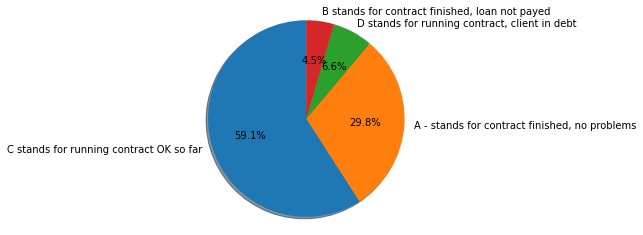

In [8]:
#Analysis of labeled(loan_status Categories)

#this is our label data
#lets check the categories

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['C stands for running contract OK so far','A - stands for contract finished, no problems','D stands for running contract, client in debt','B stands for contract finished, loan not payed',]
sizes = loan_Default_Data.loan_status.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [11]:
#if we want to do more accurate result we should consider only A and B categories
#But i don't have enough dataset so i will combine A and C as False - means loan Paid and B and D as True - means loan Default
#if you have enough dataset then plese consider just full paid and total default categories

loan_Default_Data['loan_status'] = loan_Default_Data['loan_status'].replace(['A','B','C','D'],[0,1,0,1])

In [12]:
#loan_Default_Data
#loan_Default_Data.info()

##### Remove extra features like(id's),null value column(if not important) and rearrange the index

In [13]:
#drop some non value added columns
loan_Default_Data = loan_Default_Data.drop(columns=['loan_id','loan_date','account_date','unemploymant_rate_95','unemploymant_rate_96','no_of_commited_crime_95s','no_of_commited_crime_96s','disp_id','client_id','card_id','card_issued','client_birth_date','district_name','Account__district','Client_district','district_region','disp_type',])

In [14]:
#loan_Default_Data.info()

In [15]:
#reindex the column so object value comes at the end to make it easy encoding
loan_Default_Data = loan_Default_Data.reindex(columns=['account_id','loan_ammount','loan_duration','loan_payment','no_of_inhabitants', 'no_of_inhabitants<499','no_of_inhabitants 500-1999','no_of_inhabitants 2000-9999','no_of_inhabitants>10000','district_no_of_cities','ration_of_urban_inhabitants','district_avg_salary','No.enterpreneurs/100inhabitans','Paid_loan_amount','avg_unemployment_rate','avg_crime_rate','days_btw_aco_to_lon','client_age','account_frequency','card_type','loan_status'])
#loan_Default_Data

#### Let's check Null values and handle those values

<AxesSubplot:>

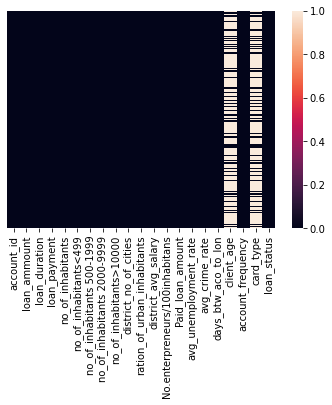

In [16]:
#check null values after reindexing the data
sns.heatmap(loan_Default_Data.isnull(),yticklabels=False)

In [17]:
#card type - change to no if there is any nan values
loan_Default_Data['card_type'].fillna('No',inplace=True)

#client age - change to 0 if there is any nan values
# this is not prefreable but as we have no choice, we can either drop or place 0 
loan_Default_Data['client_age'].fillna(0,inplace=True)

<AxesSubplot:>

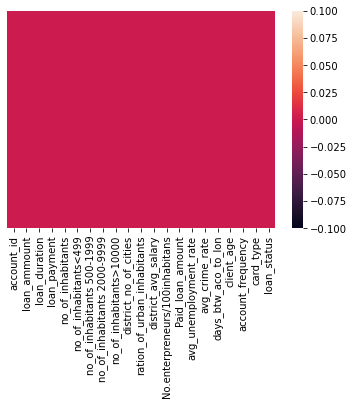

In [18]:
sns.heatmap(loan_Default_Data.isnull(),yticklabels=False)

#### check correleation between the features

In [19]:
plt.figure(figsize=(10,12))
corr = loan_Default_Data.corr()
#corr

<Figure size 720x864 with 0 Axes>

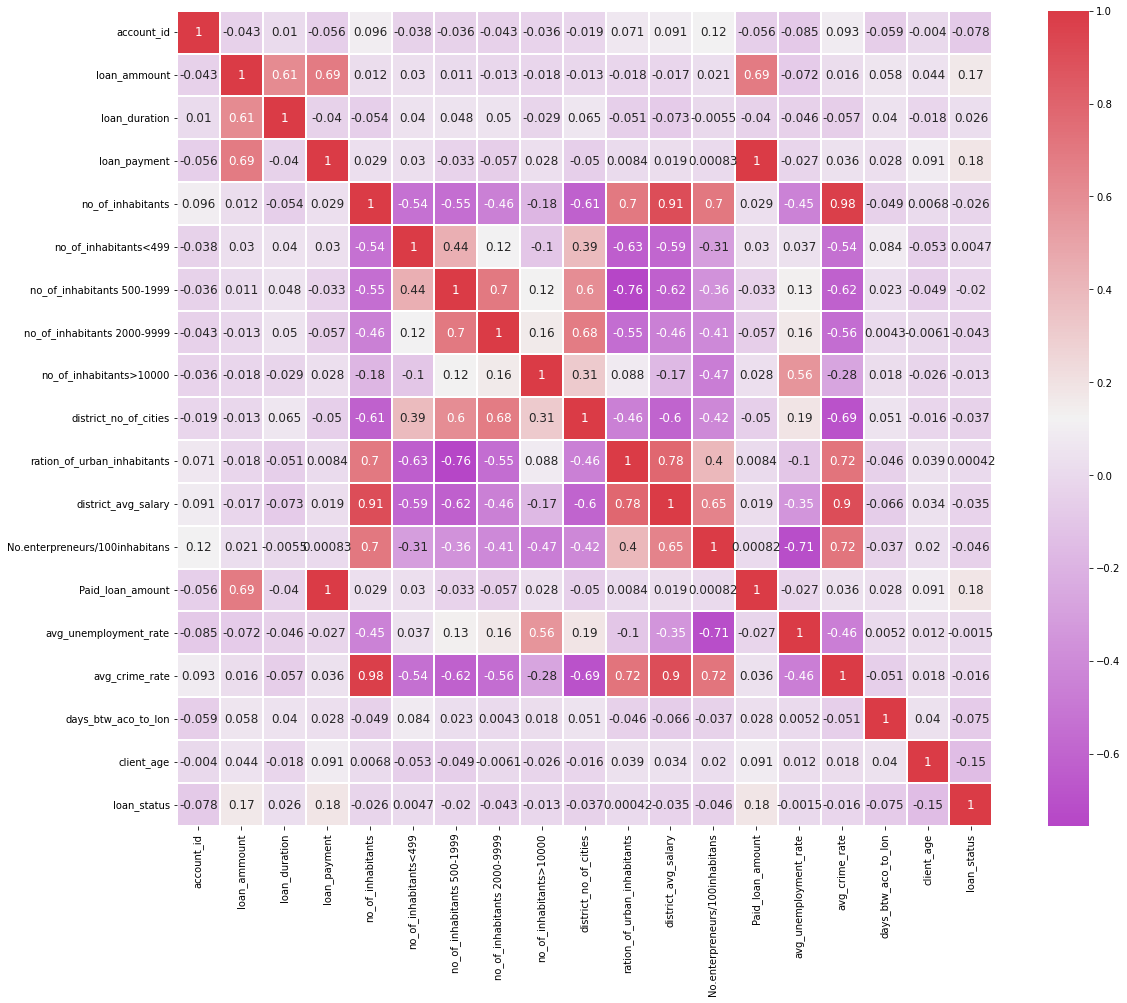

In [20]:
plt.figure(figsize=(20,15))
#sns.heatmap(corr,annot=True,cmap=plt.cm.Reds)
sns.heatmap(
    corr,
    cmap = sns.diverging_palette(300,10, as_cmap = True),
    square=True,
    center=None,
    robust=False,
    annot=True,
    annot_kws={'fontsize':12},
    linewidths=0.1,vmax=1.0,
    linecolor='white'
)

plt.show()

#### Encoding Ctegorical data

In [21]:
#convert categorical columns into Numerical, please use encoding technique
# here we will use one-hot-encoding
loan_Default_Data.shape

(682, 21)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler

#last 4 columms need sto be convert in numerical format
#num_cols = loan_Default_Data.columns[:-3]
cat_cols = loan_Default_Data.columns[-3:]

In [23]:
#do the one-hot-encoding
col_trans = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(drop='first'),['account_frequency','card_type', 'loan_status'])])

In [24]:
#in here its converting into numpy matrix value
#transfer that value in array formate by using".A"

df_transformed = col_trans.fit_transform(loan_Default_Data).A
#df_transformed

#convert array to dataframe
df = pd.DataFrame(df_transformed)
df = df.set_axis(['AF1', 'AF2', 'C1', 'C2','C3','Loan_Status',], axis=1, inplace=False)
#df.head()


In [25]:
#combine both dataframe 
loan_Default_Data_R1 = loan_Default_Data.iloc[:,:-3]
loan_Default_Data_R1

loan_Default_Data_R2 = pd.concat([loan_Default_Data_R1, pd.DataFrame(df)],axis=1)
#loan_Default_Data_R2

In [26]:
#final dataframe table for out model
loan_Default_Final_Data = loan_Default_Data_R2.iloc[: , 1:]
#loan_Default_Final_Data

In [28]:
#Save the data into CSV file
loan_Default_Final_Data.to_csv('C:/Users/pooja/OneDrive/Desktop/ML_Loan Default Prediction/Loan_Default_FE_Data.csv')